In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/imee/Downloads/Invisibility Cloak.csv')
df.head()

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6


In [8]:
df.groupby("Cloak")["Mischief"].describe()


,count,mean,std,min,25%,50%,75%,max
Cloak,,,,,,,,
0,12.0,3.75,1.912875,0.0,2.75,4.0,5.0,6.0
1,12.0,5.00,1.651446,2.0,4.00,5.0,6.0,8.0


### Assumption 1. The dependent variable (Mischief) is a continuous level.


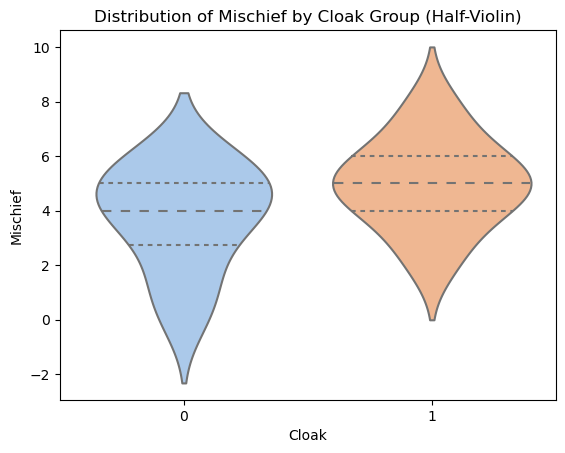

In [14]:
sns.violinplot(
    x='Cloak',
    y='Mischief',
    data=df,
    inner='quartile',  
    split=True,        
    palette='pastel'
)

plt.title("Distribution of Mischief by Cloak Group")
plt.show()


This shows Mischief is continuous.

### Assumption 2: The independent variable (Cloak) consists of two categorical, independent groups (With a cloak, Without a cloak).

<Axes: xlabel='Cloak', ylabel='Mischief'>

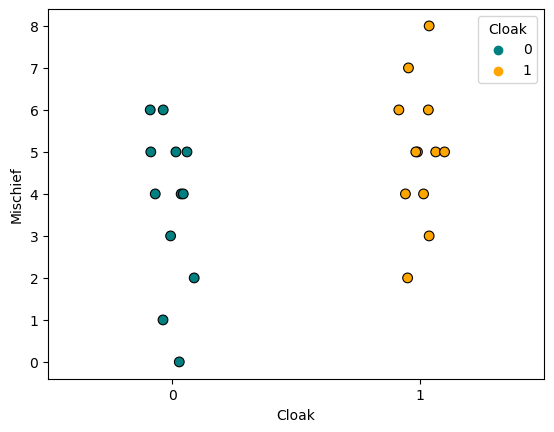

In [20]:
sns.stripplot(
    data=df, x='Cloak', y='Mischief',
    jitter=True, size=7, edgecolor='k', linewidth=0.8,
    hue='Cloak',
    palette=['teal', 'orange']
)

This shows that Cloak only has 2 categorical independent groups.

### Assumption 3: Each participant is present to only one group.

The strip plot also shows that the data only falls to one of the categories and not both

### Assumption 4: There are no significant outliers in the two groups of independent variable (Cloak) in terms of the dependent variable (Mischief), as assessed by visual inspection of boxplots.

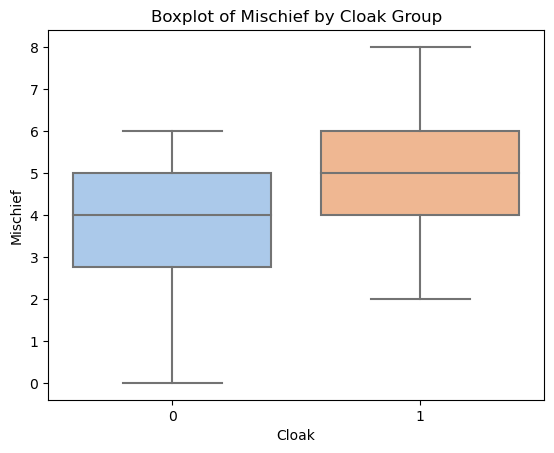

In [21]:
sns.boxplot(x='Cloak', y='Mischief', data=df, palette='pastel')
plt.title("Boxplot of Mischief by Cloak Group")
plt.show()

Either group has shown no significant outliers.

### Assumption 5: The dependent variable (Mischief) for each group (Cloak) is normally distributed (p > 0.05), as assessed by Shapiro-Wilk test.

In [29]:
group0 = df[df['Cloak'] == 0]['Mischief']
group1 = df[df['Cloak'] == 1]['Mischief']

shapiro_0 = stats.shapiro(group0)
shapiro_1 = stats.shapiro(group1)

normality_results = pd.DataFrame({
    'Group': ['Without cloak', 'With cloak'],
    'W': [shapiro_0.statistic, shapiro_1.statistic],
    'p': [shapiro_0.pvalue, shapiro_1.pvalue]
})

normality_results


,Group,W,p
0,Without cloak,0.912764,0.231446
1,With cloak,0.972617,0.936188


Both p-values of the two groups have shown to be greater than 0.05 which shows normality of the groups.

### Null Hypothesis

$H_0: \mu_1 = \mu_2$  
There is no significant difference between "With a Cloak" and "Without a Cloak" on their number of mischievous acts.

### T-Test

In [31]:
t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=True)

mean_diff = group1.mean() - group0.mean()

se_diff = np.sqrt(group0.var(ddof=1)/len(group0) + group1.var(ddof=1)/len(group1))

ci_lower = mean_diff - 1.96*se_diff
ci_upper = mean_diff + 1.96*se_diff

t_test_results = pd.DataFrame({
    't': [t_stat],
    'df': [len(group0)+len(group1)-2],
    'p': [p_value],
    'Mean Difference': [mean_diff],
    'SE Difference': [se_diff],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})

t_test_results

,t,df,p,Mean Difference,SE Difference,95% CI Lower,95% CI Upper
0,-1.713459,22,0.100686,1.25,0.729518,-0.179856,2.679856


The obtained p-value of 0.100686 > 0.05. This means the difference is not significant enough to reject the null hypothesis. This means that wearing a cloak or not does not significantly affect the attempt at committing mischief.